#### __1. 查看数据的分布情况还有数据的完整性__:
- 查看超过五十k的百分比
- 查看是每一列是否空值
- 特殊值，如 "？" 没有做处理，后面用onehot编码会替换掉

#### __1. See the distribution of the data and the integrity of the data__:
- check percentages over 50 k
- Check to see if each column is null
- Special values, such as "? No processing is done, and the oneHot encoding is replaced later

In [101]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs
import warnings

warnings.filterwarnings('ignore')

data_census = pd.read_csv("census.csv")

data = data_census
display(data.dtypes)
display(data.head(10))

# total number of the dataset
n_records = data.shape[0]

# Number of the records where individual's income is more than $50000
n_less_50k, n_exceeds_50k = data.income.value_counts()

# precentage of individuals whose income is more than $50000
exceeds_percentage = (n_exceeds_50k) / n_records * 100

print("The total records is {}".format(n_records))
print("Inviduals making more than $50k: {}".format(n_exceeds_50k))
print("Inviduals making less than $50k: {}".format(n_less_50k))
print("Percentage of individuals making more than %50k: {:.2f}%".format(exceeds_percentage))

# check whether there is null data in the training dataset
print("\n",'==== check whether there is null in dataset ====')
display(data.isnull().any(axis = 0))

'''
# check other values like "?" in work class
print("\n", "==== value counts in workclass ====")
display(data.workclass.value_counts())

# check values "?" in occupation
print("\n","==== value counts in occupation ====")
display(data.occupation.value_counts())
'''

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


The total records is 45222
Inviduals making more than $50k: 11208
Inviduals making less than $50k: 34014
Percentage of individuals making more than %50k: 24.78%

 ==== check whether there is null in dataset ====


age                False
workclass          False
education_level    False
education-num      False
marital-status     False
occupation         False
relationship       False
race               False
sex                False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool


 ==== value counts in workclass ====


 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64


 ==== value counts in occupation ====


 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

#### __2. 对数据进行预处理:__
- 对方差很大的属性列，应用对数变换
- 连续特征正则化
- 非数值征值进行on-hot编码

#### __2. Preprocess the data:__
- For very different columns, apply a logarithmic transformation
- Regularization of continuous features
- Non-numeric eigenvalues are on-hot coded

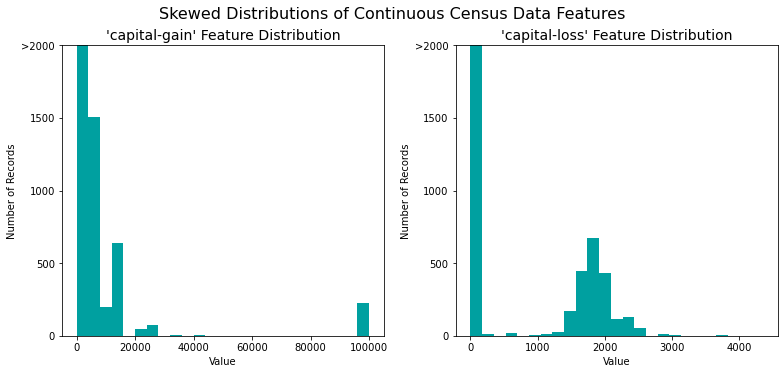

In [4]:
vs.distribution(data)

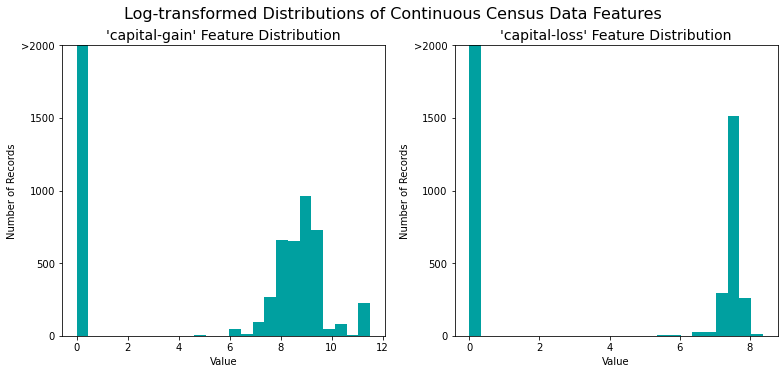

In [5]:
# split the data
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


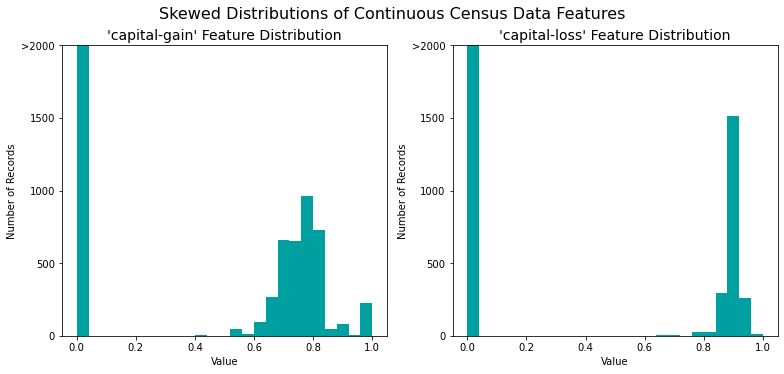

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

vs.distribution(features_log_minmax_transform)

In [7]:
from sklearn.preprocessing import LabelEncoder
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
encoder = LabelEncoder()
income = encoder.fit_transform(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after on-hot encoding".format(len(encoded)))
features_final.head(1)

103 total features after on-hot encoding


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.30137,0.8,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### __3.这里开始套模型:__
- 编写了一些通用函数
- 用linearSVC, SVC, NuSVC进行训练
- 画一些图片
- 所有模型的结果都保存再results里面，5里面展示

#### __3.Here we try the models:__
- write some basic functions
- training (linearSVC, SVC, NuSVC)
- plot pictures
- store the results in the results

In [83]:
# Import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint
from time import time
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import fbeta_score,accuracy_score 

# print the roc curve
def print_roc_auc(y_test, prediction):    
    
    # print the roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction, pos_label=1)
    
    # plot the curve
    plt.plot(fpr,tpr,marker = 'o')
    plt.show()
    
    # print the auc 
    C2 = confusion_matrix(y_test, prediction)
    
    # plot the auc
    sns.heatmap(C2, annot = True)
    AUC = auc(fpr, tpr)
    
    return AUC

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Print the curve
    print_roc_auc(y_test, predictions_test)
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(predictions_train, y_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta= 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta= 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    # Return the results
    return results

def evaluate(test, pred, accList, f1List):
    f1 = round(f1_score(test, pred, average='weighted') * 100, 2)
    acc = round(accuracy_score(test, pred) * 100, 2)
    accList.append(acc)
    f1List.append(f1)
    return accList, f1List

results = {}

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

samples_100 = len(y_train)
samples_10 = int(len(y_train)*0.1)
samples_1 = int(len(y_train)*0.01)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print(income)

Training set has 36177 samples.
Testing set has 9045 samples.
[0 0 0 ... 0 0 1]


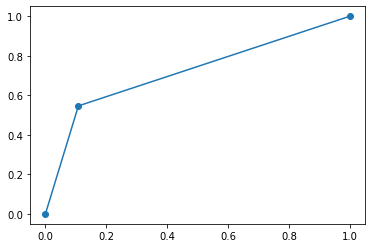

LinearSVC trained on 361 samples.


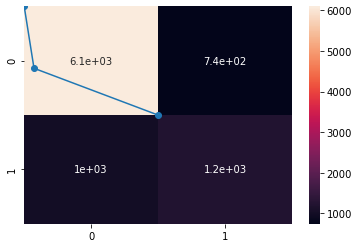

LinearSVC trained on 3617 samples.


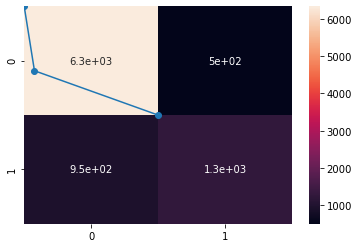

LinearSVC trained on 36177 samples.


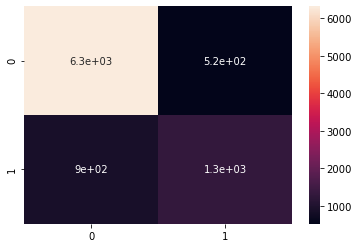

In [96]:
'''
class sklearn.svm.LinearSVC()
'''

clf = LinearSVC()

for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results[clf.__class__.__name__ + '_' + str(samples)] = train_predict(clf, samples, X_train, y_train, X_test, y_test)


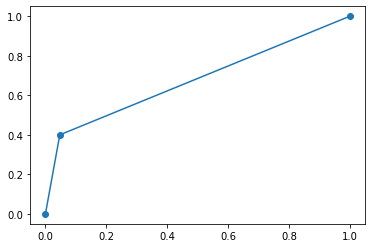

SVC trained on 361 samples.


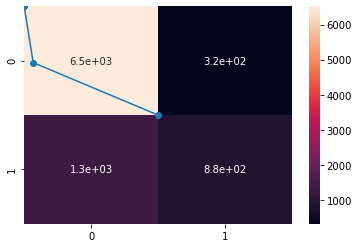

SVC trained on 3617 samples.


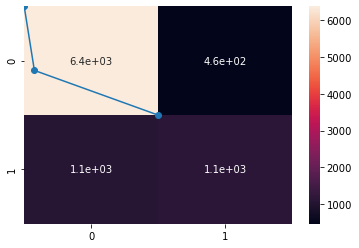

SVC trained on 36177 samples.


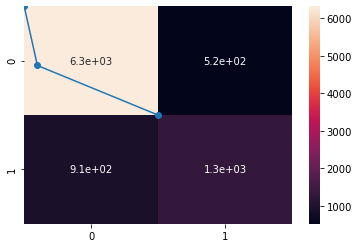

SVC trained on 361 samples.


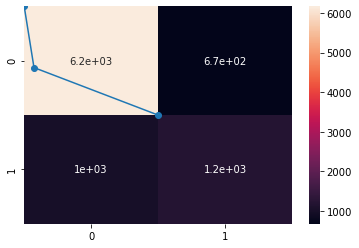

SVC trained on 3617 samples.


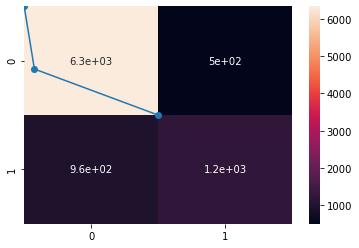

SVC trained on 36177 samples.


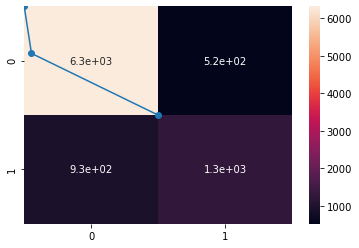

SVC trained on 361 samples.


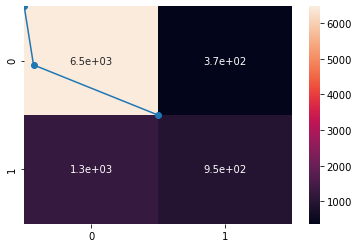

SVC trained on 3617 samples.


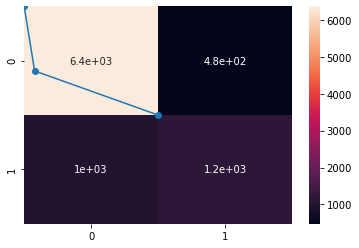

SVC trained on 36177 samples.


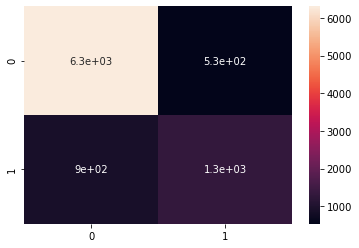

In [93]:
# svm.SVC()

clf_rbf = SVC(kernel = 'rbf')
clf_linear = SVC(kernel = 'linear')
clf_poly = SVC(kernel = 'poly')

for clf in [clf_rbf, clf_linear, clf_poly]:
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf.__class__.__name__ + '_'  + getattr(clf, 'kernel') + '_' + str(samples)] = train_predict(clf, samples, X_train, y_train, X_test, y_test)


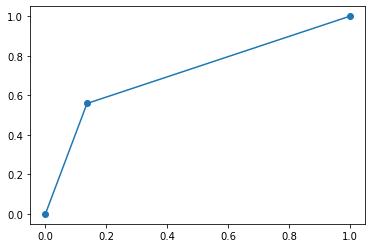

NuSVC trained on 361 samples.


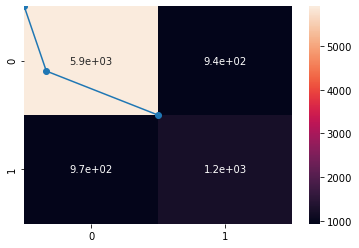

NuSVC trained on 3617 samples.


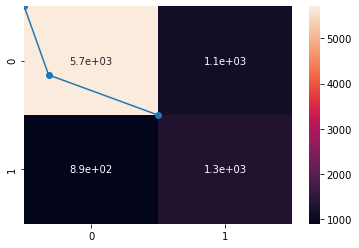

NuSVC trained on 36177 samples.


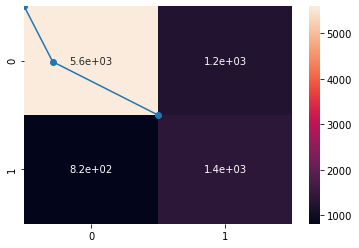

NuSVC trained on 361 samples.


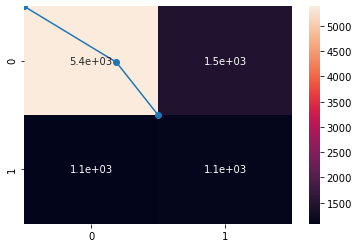

NuSVC trained on 3617 samples.


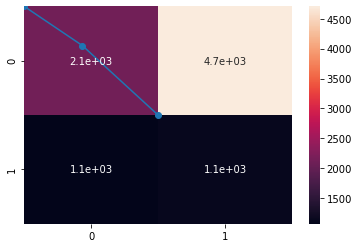

NuSVC trained on 36177 samples.


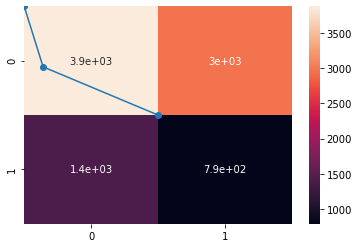

NuSVC trained on 361 samples.


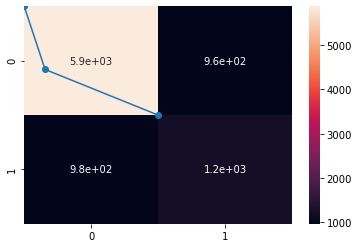

NuSVC trained on 3617 samples.


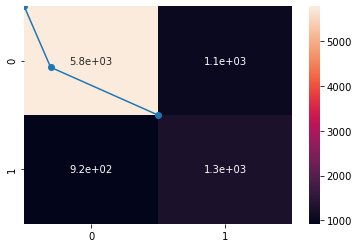

NuSVC trained on 36177 samples.


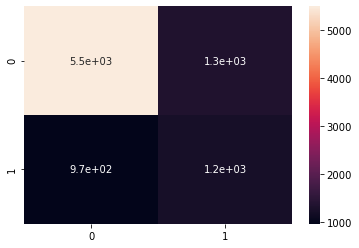

In [98]:
# svm.NuSVC()

clf_rbf = NuSVC(nu = 1/10, kernel = 'rbf')
clf_linear = NuSVC(nu = 1/10, kernel = 'linear')
clf_poly = NuSVC(nu = 1/10, kernel = 'poly')

for clf in [clf_rbf, clf_linear, clf_poly]:
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf.__class__.__name__ + '_'  + getattr(clf, 'kernel') + '_' + str(samples)] = train_predict(clf, samples, X_train, y_train, X_test, y_test)


### __4.调参:__
- 主要是C和gamma两个参数，运行时间太长了，我把结果保存在了csv文件里面
- 用跑的最好的评分参数，再运行一次SVC方法
- TODO: 参数的结果如果文档的同学需要展示，可以一起看一下怎么画图

### __4.find the best parameter:__
- find the best C and gamma parameter
- i have run the code and store the result in the params.csv
- TODO: if the params.csv need to display, we can disscuss it later

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from time import time
from sklearn.model_selection import cross_val_score


'''
====================== find the best c and the gamma  ============================
====================== this will cost 30 minutes to run ==========================
====================== i saved the result in the params.csv ======================

X = []
Y = []
Z = []
M = []

print("start")
start = time()
pca = PCA(n_components = 13)
X_new = pca.fit_transform(X_train)
end = time()
print(end - start)

start = time()
for C in range(1, 10, 1):
    for gamma in range(1, 11, 1):
        accuracy = cross_val_score(SVC(C = C/10, gamma = gamma/10), X_new, y_train, cv = 5, scoring = 'accuracy', n_jobs=-1).mean()
        X.append(C/10)
        Y.append(gamma/10)
        Z.append(accuracy)
        print(X[-1], Y[-1], Z[-1])
        end = time()
        print(end - start)
print(X)
print(Y)
print(Z)

for i in range(len(X)):
    M.append([X[i], Y[i], Z[i]])

df = pd.DataFrame(M, columns = ["C", "gamma", "accuracy"])
df.to_csv("params.csv", index = False)
'''

the best C is 0.9, and the best magga is 0.9


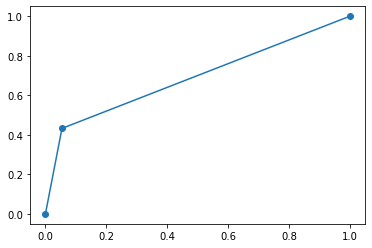

SVC trained on 361 samples.


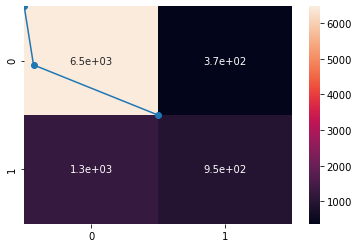

SVC trained on 3617 samples.


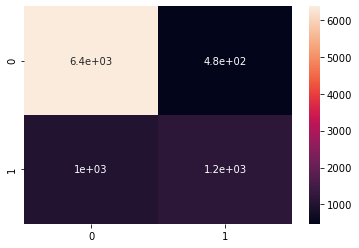

In [95]:
from sklearn.svm import SVC

params = pd.read_csv('params.csv')

list_x = params["C"]
list_y = params['gamma']

# find the best accuracy
z = list(params['accuracy'])
z = z.index(max(z))

# gamma is 0.9 and C is 0.9
c = list_x[z]
gamma = list_y[z % 10]

print("the best C is {}, and the best magga is {}".format(c, gamma))

clf_rbf = SVC(kernel = 'rbf', C = c, gamma = gamma)

for i, samples in enumerate([samples_1, samples_10]):
    results[clf.__class__.__name__ + '_'  + getattr(clf, 'kernel') + '_' + str(samples)] = train_predict(clf, samples, X_train, y_train, X_test, y_test)


#### __5. 结果展示__
- TODO: 结果的图片展示形式，可以一起看一下怎么画图

#### __5. display results__
- TODO: we can discuss how to display this results

In [102]:
pprint(results)

{'LinearSVC_361': {'acc_test': 0.8075179657269209,
                   'acc_train': 0.8833333333333333,
                   'f_test': 0.6031634798278106,
                   'f_train': 0.7876712328767123,
                   'pred_time': 0.011526346206665039,
                   'train_time': 0.0069997310638427734},
 'LinearSVC_3617': {'acc_test': 0.839690436705362,
                    'acc_train': 0.85,
                    'f_test': 0.6801689591682009,
                    'f_train': 0.7089552238805971,
                    'pred_time': 0.009005069732666016,
                    'train_time': 0.05299782752990723},
 'LinearSVC_36177': {'acc_test': 0.8426755113322277,
                     'acc_train': 0.8466666666666667,
                     'f_test': 0.6855643044619422,
                     'f_train': 0.7007575757575757,
                     'pred_time': 0.011999368667602539,
                     'train_time': 1.43434739112854},
 'NuSVC_linear_361': {'acc_test': 0.7195135433941404,
           